#DF

In [438]:
import pandas as pd

df = pd.read_csv('imf-dm-export-20240330.csv')


In [439]:
df

,Real GDP growth (Annual percent change),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Canada,3.1,3.1,1.8,2.3,2.9,0.7,1.0,3.0,2.8,1.9,-5.1,5.0,3.4,1.3
1,Denmark,1.9,1.3,0.2,0.9,1.6,2.3,3.2,2.8,2.0,1.5,-2.4,6.8,2.7,1.7
2,Finland,3.2,2.5,-1.4,-0.9,-0.4,0.5,2.8,3.2,1.1,1.2,-2.4,3.2,1.6,-0.1
3,France,1.8,2.2,0.4,0.7,1.0,1.0,1.0,2.5,1.8,1.9,-7.7,6.4,2.5,1.0
4,Germany,4.2,3.9,0.4,0.4,2.2,1.5,2.2,2.7,1.0,1.1,-3.8,3.2,1.8,-0.5
5,Japan,4.1,0.0,1.4,2.0,0.3,1.6,0.8,1.7,0.6,-0.4,-4.2,2.2,1.0,2.0
6,Korea,6.8,3.7,2.4,3.2,3.2,2.8,2.9,3.2,2.9,2.2,-0.7,4.3,2.6,1.4
7,Netherlands,1.3,1.5,-1.0,-0.1,1.4,2.0,2.2,2.9,2.4,2.0,-3.9,6.2,4.3,0.6
8,Singapore,14.5,6.2,4.4,4.8,3.9,3.0,3.6,4.5,3.6,1.3,-3.9,8.9,3.6,1.0
9,Sweden,6.0,3.2,-0.6,1.2,2.7,4.5,2.1,2.6,2.0,2.0,-2.2,6.1,2.8,-0.7


In [440]:
# Specify the EU countries you're interested in
eu_countries = ['Germany', 'France', 'Finland', 'Denmark', 'Netherlands', 'Sweden']

# Filter the DataFrame to only include the specified EU countries
df_eu = df[df['Real GDP growth (Annual percent change)'].isin(eu_countries)]

# Calculate the mean across these rows for each year
eu_avg = df_eu.mean(numeric_only=True)

# The 'eu_avg' Series now holds the average GDP growth rate for the specified EU countries for each year

# Prepare the average data for appending by converting it into a DataFrame with one row
eu_avg_df = pd.DataFrame(eu_avg).transpose()

# If you want to include a 'Country' column in the new row to label it as the EU average
eu_avg_df['Real GDP growth (Annual percent change)'] = 'European Union'  # Adding a column with the label

# Rearrange the columns to match the original DataFrame, with 'Country' at the beginning
cols = ['Real GDP growth (Annual percent change)'] + [col for col in df if col != 'Real GDP growth (Annual percent change)']
eu_avg_df = eu_avg_df[cols]

# Reset index for concatenation
eu_avg_df.reset_index(drop=True, inplace=True)

# Append the new row to the original DataFrame
df = pd.concat([df, eu_avg_df], ignore_index=True)

In [441]:
df = df[~df['Real GDP growth (Annual percent change)'].isin(eu_countries)]

In [442]:
df.rename(columns={'Real GDP growth (Annual percent change)': 'Country'}, inplace=True)

In [443]:
df.reset_index(drop=True, inplace=True)

In [444]:
df

,Country,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Canada,3.100000,3.100000,1.800000,2.300000,2.900000,0.700000,1.00,3.000000,2.800000,1.900000,-5.100000,5.000000,3.400000,1.300000
1,Japan,4.100000,0.000000,1.400000,2.000000,0.300000,1.600000,0.80,1.700000,0.600000,-0.400000,-4.200000,2.200000,1.000000,2.000000
2,Korea,6.800000,3.700000,2.400000,3.200000,3.200000,2.800000,2.90,3.200000,2.900000,2.200000,-0.700000,4.300000,2.600000,1.400000
3,Singapore,14.500000,6.200000,4.400000,4.800000,3.900000,3.000000,3.60,4.500000,3.600000,1.300000,-3.900000,8.900000,3.600000,1.000000
4,Switzerland,3.200000,1.900000,1.200000,1.800000,2.300000,1.600000,2.10,1.400000,2.900000,1.200000,-2.300000,5.400000,2.700000,0.900000
5,United Kingdom,2.400000,1.100000,1.400000,1.800000,3.200000,2.400000,2.20,2.400000,1.700000,1.600000,-11.000000,7.600000,4.100000,0.500000
6,United States,2.700000,1.500000,2.300000,1.800000,2.300000,2.700000,1.70,2.200000,2.900000,2.300000,-2.800000,5.900000,2.100000,2.100000
7,European Union,3.066667,2.433333,-0.333333,0.366667,1.416667,1.966667,2.25,2.783333,1.716667,1.616667,-3.733333,5.316667,2.616667,0.333333


In [445]:
# Iterate through each column and add the suffix "_% Real GDP Growth" to each column except the first one
df.columns = [col if i == 0 else f"{col}_% Real GDP Growth" for i, col in enumerate(df.columns)]

In [446]:
df

,Country,2010_% Real GDP Growth,2011_% Real GDP Growth,2012_% Real GDP Growth,2013_% Real GDP Growth,2014_% Real GDP Growth,2015_% Real GDP Growth,2016_% Real GDP Growth,2017_% Real GDP Growth,2018_% Real GDP Growth,2019_% Real GDP Growth,2020_% Real GDP Growth,2021_% Real GDP Growth,2022_% Real GDP Growth,2023_% Real GDP Growth
0,Canada,3.100000,3.100000,1.800000,2.300000,2.900000,0.700000,1.00,3.000000,2.800000,1.900000,-5.100000,5.000000,3.400000,1.300000
1,Japan,4.100000,0.000000,1.400000,2.000000,0.300000,1.600000,0.80,1.700000,0.600000,-0.400000,-4.200000,2.200000,1.000000,2.000000
2,Korea,6.800000,3.700000,2.400000,3.200000,3.200000,2.800000,2.90,3.200000,2.900000,2.200000,-0.700000,4.300000,2.600000,1.400000
3,Singapore,14.500000,6.200000,4.400000,4.800000,3.900000,3.000000,3.60,4.500000,3.600000,1.300000,-3.900000,8.900000,3.600000,1.000000
4,Switzerland,3.200000,1.900000,1.200000,1.800000,2.300000,1.600000,2.10,1.400000,2.900000,1.200000,-2.300000,5.400000,2.700000,0.900000
5,United Kingdom,2.400000,1.100000,1.400000,1.800000,3.200000,2.400000,2.20,2.400000,1.700000,1.600000,-11.000000,7.600000,4.100000,0.500000
6,United States,2.700000,1.500000,2.300000,1.800000,2.300000,2.700000,1.70,2.200000,2.900000,2.300000,-2.800000,5.900000,2.100000,2.100000
7,European Union,3.066667,2.433333,-0.333333,0.366667,1.416667,1.966667,2.25,2.783333,1.716667,1.616667,-3.733333,5.316667,2.616667,0.333333


#DF2

In [447]:
df2 = pd.read_csv('API_NE.EXP.GNFS.KD.ZG_DS2_en_csv_v2_118.csv')


In [448]:
df2.columns = [col if i == 0 else f"{col}_Exports of goods and services (annual % growth)" for i, col in enumerate(df2.columns)]

In [449]:
df2

,Country,2010_Exports of goods and services (annual % growth),2011_Exports of goods and services (annual % growth),2012_Exports of goods and services (annual % growth),2013_Exports of goods and services (annual % growth),2014_Exports of goods and services (annual % growth),2015_Exports of goods and services (annual % growth),2016_Exports of goods and services (annual % growth),2017_Exports of goods and services (annual % growth),2018_Exports of goods and services (annual % growth),2019_Exports of goods and services (annual % growth),2020_Exports of goods and services (annual % growth),2021_Exports of goods and services (annual % growth),2022_Exports of goods and services (annual % growth)
0,Canada,6.675848,4.797254,2.764197,2.453414,6.319079,3.398837,1.525246,1.490838,3.574122,2.286556,-8.980876,2.729318,3.200737
1,Switzerland,12.605791,4.040600,0.688026,14.171961,-5.034251,4.023777,5.977683,-0.376952,3.372864,-0.678189,-5.240192,13.766432,5.932572
2,European Union,10.990962,6.702184,2.206738,2.092297,4.800969,6.624077,3.496624,5.764239,3.749712,3.425882,-8.443406,11.238940,7.458898
3,United Kingdom,6.545464,6.928213,0.760116,0.284523,1.004985,3.773422,2.774381,6.765556,3.086065,1.996940,-11.469713,4.941180,8.970321
4,Japan,24.860737,-0.119601,0.145733,0.810553,9.341807,3.211235,1.618284,6.619072,3.759600,-1.458491,-11.594677,11.872177,5.283077
5,Korea,13.027822,15.417200,5.793411,3.820237,2.095563,0.234197,2.372289,2.480345,3.975937,0.238336,-1.706806,11.094740,3.428530
6,Singapore,17.787665,7.690486,1.397155,6.139843,3.619962,4.967698,0.016866,7.507176,7.814914,0.235829,0.429250,11.710116,-1.302606
7,United States,12.649002,7.178158,4.018171,3.010344,3.902323,0.319626,0.474057,4.114381,2.854086,0.511353,-13.129449,6.343283,6.959663


In [450]:
combined_df = pd.merge(df, df2, on='Country', how='inner')

In [451]:
combined_df

,Country,2010_% Real GDP Growth,2011_% Real GDP Growth,2012_% Real GDP Growth,2013_% Real GDP Growth,2014_% Real GDP Growth,2015_% Real GDP Growth,2016_% Real GDP Growth,2017_% Real GDP Growth,2018_% Real GDP Growth,...,2013_Exports of goods and services (annual % growth),2014_Exports of goods and services (annual % growth),2015_Exports of goods and services (annual % growth),2016_Exports of goods and services (annual % growth),2017_Exports of goods and services (annual % growth),2018_Exports of goods and services (annual % growth),2019_Exports of goods and services (annual % growth),2020_Exports of goods and services (annual % growth),2021_Exports of goods and services (annual % growth),2022_Exports of goods and services (annual % growth)
0,Canada,3.100000,3.100000,1.800000,2.300000,2.900000,0.700000,1.00,3.000000,2.800000,...,2.453414,6.319079,3.398837,1.525246,1.490838,3.574122,2.286556,-8.980876,2.729318,3.200737
1,Japan,4.100000,0.000000,1.400000,2.000000,0.300000,1.600000,0.80,1.700000,0.600000,...,0.810553,9.341807,3.211235,1.618284,6.619072,3.759600,-1.458491,-11.594677,11.872177,5.283077
2,Korea,6.800000,3.700000,2.400000,3.200000,3.200000,2.800000,2.90,3.200000,2.900000,...,3.820237,2.095563,0.234197,2.372289,2.480345,3.975937,0.238336,-1.706806,11.094740,3.428530
3,Singapore,14.500000,6.200000,4.400000,4.800000,3.900000,3.000000,3.60,4.500000,3.600000,...,6.139843,3.619962,4.967698,0.016866,7.507176,7.814914,0.235829,0.429250,11.710116,-1.302606
4,Switzerland,3.200000,1.900000,1.200000,1.800000,2.300000,1.600000,2.10,1.400000,2.900000,...,14.171961,-5.034251,4.023777,5.977683,-0.376952,3.372864,-0.678189,-5.240192,13.766432,5.932572
5,United Kingdom,2.400000,1.100000,1.400000,1.800000,3.200000,2.400000,2.20,2.400000,1.700000,...,0.284523,1.004985,3.773422,2.774381,6.765556,3.086065,1.996940,-11.469713,4.941180,8.970321
6,United States,2.700000,1.500000,2.300000,1.800000,2.300000,2.700000,1.70,2.200000,2.900000,...,3.010344,3.902323,0.319626,0.474057,4.114381,2.854086,0.511353,-13.129449,6.343283,6.959663
7,European Union,3.066667,2.433333,-0.333333,0.366667,1.416667,1.966667,2.25,2.783333,1.716667,...,2.092297,4.800969,6.624077,3.496624,5.764239,3.749712,3.425882,-8.443406,11.238940,7.458898


In [452]:
combined_df.columns

Index(['Country', '2010_% Real GDP Growth', '2011_% Real GDP Growth',
       '2012_% Real GDP Growth', '2013_% Real GDP Growth',
       '2014_% Real GDP Growth', '2015_% Real GDP Growth',
       '2016_% Real GDP Growth', '2017_% Real GDP Growth',
       '2018_% Real GDP Growth', '2019_% Real GDP Growth',
       '2020_% Real GDP Growth', '2021_% Real GDP Growth',
       '2022_% Real GDP Growth', '2023_% Real GDP Growth',
       '2010_Exports of goods and services (annual % growth)',
       '2011_Exports of goods and services (annual % growth)',
       '2012_Exports of goods and services (annual % growth)',
       '2013_Exports of goods and services (annual % growth)',
       '2014_Exports of goods and services (annual % growth)',
       '2015_Exports of goods and services (annual % growth)',
       '2016_Exports of goods and services (annual % growth)',
       '2017_Exports of goods and services (annual % growth)',
       '2018_Exports of goods and services (annual % growth)',
       '2

#DF3

In [453]:
df3 = pd.read_csv('tfp-at-constant-national-prices-20111.csv')

In [454]:
df3

,Entity,Year,Total factor productivity index (using national accounts) (2017=1)
0,Angola,1974,1.227137
1,Angola,1975,1.122005
2,Angola,1976,1.025299
3,Angola,1977,0.996829
4,Angola,1978,0.915052
...,...,...,...
6313,Zimbabwe,2015,0.999666
6314,Zimbabwe,2016,0.980511
6315,Zimbabwe,2017,1.000000
6316,Zimbabwe,2018,1.018163


In [455]:
import pandas as pd

# Assuming your DataFrame is named df
# And you have a list of the eight countries you're interested in
countries = ['Canada', 'Switzerland', 'Germany', 'France', 'Finland', 'Denmark', 'Netherlands', 'Sweden', 'United Kingdom',
             'Japan', 'South Korea', 'Singapore', 'United States']

# Step 1: Filter for years 2019 onwards and for the eight specified countries
df_filtered = df3[(df3['Year'] >= 2010) & (df3['Entity'].isin(countries))]

# Step 2: Pivot the DataFrame
df_pivoted = df_filtered.pivot(index='Entity', columns='Year', values='Total factor productivity index (using national accounts) (2017=1)')

# Step 3: Rename the columns to add your specific label
df_pivoted.columns = [f"{year}_Total factor productivity index" for year in df_pivoted.columns]

# Reset index to make 'Country' a column again if necessary
df_pivoted.reset_index(inplace=True)

# The df_pivoted now has the format you described


In [456]:
df_pivoted

,Entity,2010_Total factor productivity index,2011_Total factor productivity index,2012_Total factor productivity index,2013_Total factor productivity index,2014_Total factor productivity index,2015_Total factor productivity index,2016_Total factor productivity index,2017_Total factor productivity index,2018_Total factor productivity index,2019_Total factor productivity index
0,Canada,0.970381,0.979386,0.975002,0.980288,0.995387,0.985647,0.984450,1.0,1.006621,1.012811
1,Denmark,0.947972,0.949599,0.955431,0.956629,0.964866,0.975630,0.987294,1.0,1.013451,1.026076
2,Finland,0.997309,1.006438,0.982332,0.973820,0.966954,0.966509,0.982180,1.0,0.990057,0.984099
3,France,0.988147,0.992857,0.986448,0.989419,0.991487,0.991391,0.987417,1.0,1.004719,0.997134
4,Germany,0.934333,0.956630,0.957805,0.958837,0.968998,0.975287,0.988484,1.0,0.996553,0.990668
5,Japan,0.953958,0.953258,0.963423,0.982661,0.980420,0.987467,0.987011,1.0,0.994666,1.004506
6,Netherlands,0.993211,0.995977,0.985081,0.982863,0.988786,0.988997,0.990747,1.0,1.002436,0.998827
7,Singapore,1.069730,1.078039,1.056549,1.041813,1.026167,1.013006,1.000737,1.0,0.992688,0.952999
8,South Korea,0.965029,0.973469,0.969531,0.974217,0.980396,0.980001,0.986673,1.0,1.012662,1.011867
9,Sweden,0.952682,0.962592,0.950687,0.954196,0.965380,0.991747,0.991155,1.0,1.002635,1.010664


In [457]:
import pandas as pd

# List of EU countries you're interested in
eu_countries = ['Germany', 'France', 'Finland', 'Denmark', 'Netherlands', 'Sweden']

# Since your DataFrame uses 'Entity' for countries, adjust the filter accordingly
df_eu = df_pivoted[df_pivoted['Entity'].isin(eu_countries)]

# Calculate the mean across these rows for each year (excluding the 'Entity' column for calculation)
eu_avg = df_eu.drop('Entity', axis=1).mean()

# Create a DataFrame from the mean Series
eu_avg_df = pd.DataFrame(eu_avg).transpose()

# Adding the 'Entity' column to label this row as 'European Union'
eu_avg_df['Entity'] = 'European Union'

# Moving 'Entity' column to the front
cols = eu_avg_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
eu_avg_df = eu_avg_df[cols]

# Reset index for concatenation (if needed)
eu_avg_df.reset_index(drop=True, inplace=True)

# Append the new row to the original DataFrame
df_pivoted = pd.concat([df_pivoted, eu_avg_df], ignore_index=True)

# Now, df_pivoted contains the original data plus a new row with the average Total Factor Productivity Index for the specified EU countries


In [458]:
df_pivoted  = df_pivoted [~df_pivoted ['Entity'].isin(eu_countries)]

In [459]:
df_pivoted

,Entity,2010_Total factor productivity index,2011_Total factor productivity index,2012_Total factor productivity index,2013_Total factor productivity index,2014_Total factor productivity index,2015_Total factor productivity index,2016_Total factor productivity index,2017_Total factor productivity index,2018_Total factor productivity index,2019_Total factor productivity index
0,Canada,0.970381,0.979386,0.975002,0.980288,0.995387,0.985647,0.984450,1.0,1.006621,1.012811
5,Japan,0.953958,0.953258,0.963423,0.982661,0.980420,0.987467,0.987011,1.0,0.994666,1.004506
7,Singapore,1.069730,1.078039,1.056549,1.041813,1.026167,1.013006,1.000737,1.0,0.992688,0.952999
8,South Korea,0.965029,0.973469,0.969531,0.974217,0.980396,0.980001,0.986673,1.0,1.012662,1.011867
10,Switzerland,0.976546,0.974189,0.972274,0.982450,0.990940,0.984979,0.989170,1.0,1.019410,1.020055
11,United Kingdom,0.982106,0.986902,0.982966,0.987310,0.991722,0.997975,0.998124,1.0,0.998898,0.995244
12,United States,0.976707,0.974878,0.977446,0.979362,0.983973,0.992851,0.993718,1.0,1.008182,1.016862
13,European Union,0.968942,0.977349,0.969631,0.969294,0.974412,0.981593,0.987880,1.0,1.001642,1.001245


In [460]:
df_pivoted.rename(columns={'Entity': 'Country'}, inplace=True)
df_pivoted

,Country,2010_Total factor productivity index,2011_Total factor productivity index,2012_Total factor productivity index,2013_Total factor productivity index,2014_Total factor productivity index,2015_Total factor productivity index,2016_Total factor productivity index,2017_Total factor productivity index,2018_Total factor productivity index,2019_Total factor productivity index
0,Canada,0.970381,0.979386,0.975002,0.980288,0.995387,0.985647,0.984450,1.0,1.006621,1.012811
5,Japan,0.953958,0.953258,0.963423,0.982661,0.980420,0.987467,0.987011,1.0,0.994666,1.004506
7,Singapore,1.069730,1.078039,1.056549,1.041813,1.026167,1.013006,1.000737,1.0,0.992688,0.952999
8,South Korea,0.965029,0.973469,0.969531,0.974217,0.980396,0.980001,0.986673,1.0,1.012662,1.011867
10,Switzerland,0.976546,0.974189,0.972274,0.982450,0.990940,0.984979,0.989170,1.0,1.019410,1.020055
11,United Kingdom,0.982106,0.986902,0.982966,0.987310,0.991722,0.997975,0.998124,1.0,0.998898,0.995244
12,United States,0.976707,0.974878,0.977446,0.979362,0.983973,0.992851,0.993718,1.0,1.008182,1.016862
13,European Union,0.968942,0.977349,0.969631,0.969294,0.974412,0.981593,0.987880,1.0,1.001642,1.001245


In [461]:
df_pivoted.reset_index(inplace=True)
df_pivoted.replace("South Korea", "Korea", inplace=True)
df_pivoted

,index,Country,2010_Total factor productivity index,2011_Total factor productivity index,2012_Total factor productivity index,2013_Total factor productivity index,2014_Total factor productivity index,2015_Total factor productivity index,2016_Total factor productivity index,2017_Total factor productivity index,2018_Total factor productivity index,2019_Total factor productivity index
0,0,Canada,0.970381,0.979386,0.975002,0.980288,0.995387,0.985647,0.984450,1.0,1.006621,1.012811
1,5,Japan,0.953958,0.953258,0.963423,0.982661,0.980420,0.987467,0.987011,1.0,0.994666,1.004506
2,7,Singapore,1.069730,1.078039,1.056549,1.041813,1.026167,1.013006,1.000737,1.0,0.992688,0.952999
3,8,Korea,0.965029,0.973469,0.969531,0.974217,0.980396,0.980001,0.986673,1.0,1.012662,1.011867
4,10,Switzerland,0.976546,0.974189,0.972274,0.982450,0.990940,0.984979,0.989170,1.0,1.019410,1.020055
5,11,United Kingdom,0.982106,0.986902,0.982966,0.987310,0.991722,0.997975,0.998124,1.0,0.998898,0.995244
6,12,United States,0.976707,0.974878,0.977446,0.979362,0.983973,0.992851,0.993718,1.0,1.008182,1.016862
7,13,European Union,0.968942,0.977349,0.969631,0.969294,0.974412,0.981593,0.987880,1.0,1.001642,1.001245


In [462]:
df_pivoted.drop(df_pivoted.columns[0], axis=1, inplace=True)
df_pivoted

,Country,2010_Total factor productivity index,2011_Total factor productivity index,2012_Total factor productivity index,2013_Total factor productivity index,2014_Total factor productivity index,2015_Total factor productivity index,2016_Total factor productivity index,2017_Total factor productivity index,2018_Total factor productivity index,2019_Total factor productivity index
0,Canada,0.970381,0.979386,0.975002,0.980288,0.995387,0.985647,0.984450,1.0,1.006621,1.012811
1,Japan,0.953958,0.953258,0.963423,0.982661,0.980420,0.987467,0.987011,1.0,0.994666,1.004506
2,Singapore,1.069730,1.078039,1.056549,1.041813,1.026167,1.013006,1.000737,1.0,0.992688,0.952999
3,Korea,0.965029,0.973469,0.969531,0.974217,0.980396,0.980001,0.986673,1.0,1.012662,1.011867
4,Switzerland,0.976546,0.974189,0.972274,0.982450,0.990940,0.984979,0.989170,1.0,1.019410,1.020055
5,United Kingdom,0.982106,0.986902,0.982966,0.987310,0.991722,0.997975,0.998124,1.0,0.998898,0.995244
6,United States,0.976707,0.974878,0.977446,0.979362,0.983973,0.992851,0.993718,1.0,1.008182,1.016862
7,European Union,0.968942,0.977349,0.969631,0.969294,0.974412,0.981593,0.987880,1.0,1.001642,1.001245


In [463]:
print(combined_df.columns)
print(df3.columns)

Index(['Country', '2010_% Real GDP Growth', '2011_% Real GDP Growth',
       '2012_% Real GDP Growth', '2013_% Real GDP Growth',
       '2014_% Real GDP Growth', '2015_% Real GDP Growth',
       '2016_% Real GDP Growth', '2017_% Real GDP Growth',
       '2018_% Real GDP Growth', '2019_% Real GDP Growth',
       '2020_% Real GDP Growth', '2021_% Real GDP Growth',
       '2022_% Real GDP Growth', '2023_% Real GDP Growth',
       '2010_Exports of goods and services (annual % growth)',
       '2011_Exports of goods and services (annual % growth)',
       '2012_Exports of goods and services (annual % growth)',
       '2013_Exports of goods and services (annual % growth)',
       '2014_Exports of goods and services (annual % growth)',
       '2015_Exports of goods and services (annual % growth)',
       '2016_Exports of goods and services (annual % growth)',
       '2017_Exports of goods and services (annual % growth)',
       '2018_Exports of goods and services (annual % growth)',
       '2

In [464]:
combined_df = pd.merge(combined_df, df_pivoted, on='Country', how='inner')

In [465]:
combined_df

,Country,2010_% Real GDP Growth,2011_% Real GDP Growth,2012_% Real GDP Growth,2013_% Real GDP Growth,2014_% Real GDP Growth,2015_% Real GDP Growth,2016_% Real GDP Growth,2017_% Real GDP Growth,2018_% Real GDP Growth,...,2010_Total factor productivity index,2011_Total factor productivity index,2012_Total factor productivity index,2013_Total factor productivity index,2014_Total factor productivity index,2015_Total factor productivity index,2016_Total factor productivity index,2017_Total factor productivity index,2018_Total factor productivity index,2019_Total factor productivity index
0,Canada,3.100000,3.100000,1.800000,2.300000,2.900000,0.700000,1.00,3.000000,2.800000,...,0.970381,0.979386,0.975002,0.980288,0.995387,0.985647,0.984450,1.0,1.006621,1.012811
1,Japan,4.100000,0.000000,1.400000,2.000000,0.300000,1.600000,0.80,1.700000,0.600000,...,0.953958,0.953258,0.963423,0.982661,0.980420,0.987467,0.987011,1.0,0.994666,1.004506
2,Korea,6.800000,3.700000,2.400000,3.200000,3.200000,2.800000,2.90,3.200000,2.900000,...,0.965029,0.973469,0.969531,0.974217,0.980396,0.980001,0.986673,1.0,1.012662,1.011867
3,Singapore,14.500000,6.200000,4.400000,4.800000,3.900000,3.000000,3.60,4.500000,3.600000,...,1.069730,1.078039,1.056549,1.041813,1.026167,1.013006,1.000737,1.0,0.992688,0.952999
4,Switzerland,3.200000,1.900000,1.200000,1.800000,2.300000,1.600000,2.10,1.400000,2.900000,...,0.976546,0.974189,0.972274,0.982450,0.990940,0.984979,0.989170,1.0,1.019410,1.020055
5,United Kingdom,2.400000,1.100000,1.400000,1.800000,3.200000,2.400000,2.20,2.400000,1.700000,...,0.982106,0.986902,0.982966,0.987310,0.991722,0.997975,0.998124,1.0,0.998898,0.995244
6,United States,2.700000,1.500000,2.300000,1.800000,2.300000,2.700000,1.70,2.200000,2.900000,...,0.976707,0.974878,0.977446,0.979362,0.983973,0.992851,0.993718,1.0,1.008182,1.016862
7,European Union,3.066667,2.433333,-0.333333,0.366667,1.416667,1.966667,2.25,2.783333,1.716667,...,0.968942,0.977349,0.969631,0.969294,0.974412,0.981593,0.987880,1.0,1.001642,1.001245


#DF4

In [466]:
df4 = pd.read_csv('API_BX.KLT.DINV.CD.WD_DS2_en_csv_v2_28.csv')

In [467]:
df4

,Country Name,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Canada,2.971474e+10,3.833833e+10,4.936899e+10,6.702787e+10,6.417461e+10,5.998621e+10,3.420187e+10,2.535780e+10,4.260376e+10,4.894230e+10,2.912301e+10,5.912510e+10,4.998466e+10
1,Switzerland,1.767074e+10,2.076448e+10,3.994349e+10,-2.492647e+10,2.100309e+10,1.187520e+11,1.668010e+11,1.432360e+11,-1.603880e+11,8.774914e+09,-2.421680e+11,-1.172060e+11,-1.098893e+10
2,European Union,5.395830e+11,8.777450e+11,5.651780e+11,6.171000e+11,4.325970e+11,8.172890e+11,7.226400e+11,5.295970e+11,-7.679005e+10,5.074620e+11,2.110060e+11,5.477730e+11,1.350320e+11
3,United Kingdom,6.673455e+10,2.701205e+10,4.675079e+10,5.447318e+10,5.889045e+10,4.533348e+10,3.248130e+11,1.253590e+11,-2.505544e+10,1.979076e+10,1.571860e+11,5.922253e+09,4.489792e+10
4,Japan,7.440979e+09,-8.507170e+08,5.469627e+08,1.064844e+10,1.975225e+10,5.252218e+09,4.095418e+10,1.880225e+10,2.528937e+10,3.996054e+10,6.258472e+10,3.520442e+10,4.927884e+10
5,Korea,9.497400e+09,9.773000e+09,9.495900e+09,1.276660e+10,9.273600e+09,4.104100e+09,1.210430e+10,1.791290e+10,1.218260e+10,9.634300e+09,8.764900e+09,2.206040e+10,1.799600e+10
6,Singapore,5.532243e+10,4.915566e+10,5.531081e+10,6.438951e+10,6.869847e+10,6.977455e+10,6.536299e+10,1.021600e+11,8.116090e+10,1.052930e+11,7.844758e+10,1.385440e+11,1.408440e+11
7,United States,2.640390e+11,2.634970e+11,2.503450e+11,2.881310e+11,2.518560e+11,5.114340e+11,4.743880e+11,3.808230e+11,2.147150e+11,3.159840e+11,1.383630e+11,4.930850e+11,3.880780e+11


In [468]:
df4

,Country Name,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Canada,2.971474e+10,3.833833e+10,4.936899e+10,6.702787e+10,6.417461e+10,5.998621e+10,3.420187e+10,2.535780e+10,4.260376e+10,4.894230e+10,2.912301e+10,5.912510e+10,4.998466e+10
1,Switzerland,1.767074e+10,2.076448e+10,3.994349e+10,-2.492647e+10,2.100309e+10,1.187520e+11,1.668010e+11,1.432360e+11,-1.603880e+11,8.774914e+09,-2.421680e+11,-1.172060e+11,-1.098893e+10
2,European Union,5.395830e+11,8.777450e+11,5.651780e+11,6.171000e+11,4.325970e+11,8.172890e+11,7.226400e+11,5.295970e+11,-7.679005e+10,5.074620e+11,2.110060e+11,5.477730e+11,1.350320e+11
3,United Kingdom,6.673455e+10,2.701205e+10,4.675079e+10,5.447318e+10,5.889045e+10,4.533348e+10,3.248130e+11,1.253590e+11,-2.505544e+10,1.979076e+10,1.571860e+11,5.922253e+09,4.489792e+10
4,Japan,7.440979e+09,-8.507170e+08,5.469627e+08,1.064844e+10,1.975225e+10,5.252218e+09,4.095418e+10,1.880225e+10,2.528937e+10,3.996054e+10,6.258472e+10,3.520442e+10,4.927884e+10
5,Korea,9.497400e+09,9.773000e+09,9.495900e+09,1.276660e+10,9.273600e+09,4.104100e+09,1.210430e+10,1.791290e+10,1.218260e+10,9.634300e+09,8.764900e+09,2.206040e+10,1.799600e+10
6,Singapore,5.532243e+10,4.915566e+10,5.531081e+10,6.438951e+10,6.869847e+10,6.977455e+10,6.536299e+10,1.021600e+11,8.116090e+10,1.052930e+11,7.844758e+10,1.385440e+11,1.408440e+11
7,United States,2.640390e+11,2.634970e+11,2.503450e+11,2.881310e+11,2.518560e+11,5.114340e+11,4.743880e+11,3.808230e+11,2.147150e+11,3.159840e+11,1.383630e+11,4.930850e+11,3.880780e+11


In [469]:
df4.columns = [f"{year}_Foreign direct investment, net inflows (BoP, current US$)" for year in df4.columns]

In [470]:
df4.rename(columns={'Country Name_Foreign direct investment, net inflows (BoP, current US$)': 'Country'}, inplace=True)

In [471]:
df4

,Country,"2010_Foreign direct investment, net inflows (BoP, current US$)","2011_Foreign direct investment, net inflows (BoP, current US$)","2012_Foreign direct investment, net inflows (BoP, current US$)","2013_Foreign direct investment, net inflows (BoP, current US$)","2014_Foreign direct investment, net inflows (BoP, current US$)","2015_Foreign direct investment, net inflows (BoP, current US$)","2016_Foreign direct investment, net inflows (BoP, current US$)","2017_Foreign direct investment, net inflows (BoP, current US$)","2018_Foreign direct investment, net inflows (BoP, current US$)","2019_Foreign direct investment, net inflows (BoP, current US$)","2020_Foreign direct investment, net inflows (BoP, current US$)","2021_Foreign direct investment, net inflows (BoP, current US$)","2022_Foreign direct investment, net inflows (BoP, current US$)"
0,Canada,2.971474e+10,3.833833e+10,4.936899e+10,6.702787e+10,6.417461e+10,5.998621e+10,3.420187e+10,2.535780e+10,4.260376e+10,4.894230e+10,2.912301e+10,5.912510e+10,4.998466e+10
1,Switzerland,1.767074e+10,2.076448e+10,3.994349e+10,-2.492647e+10,2.100309e+10,1.187520e+11,1.668010e+11,1.432360e+11,-1.603880e+11,8.774914e+09,-2.421680e+11,-1.172060e+11,-1.098893e+10
2,European Union,5.395830e+11,8.777450e+11,5.651780e+11,6.171000e+11,4.325970e+11,8.172890e+11,7.226400e+11,5.295970e+11,-7.679005e+10,5.074620e+11,2.110060e+11,5.477730e+11,1.350320e+11
3,United Kingdom,6.673455e+10,2.701205e+10,4.675079e+10,5.447318e+10,5.889045e+10,4.533348e+10,3.248130e+11,1.253590e+11,-2.505544e+10,1.979076e+10,1.571860e+11,5.922253e+09,4.489792e+10
4,Japan,7.440979e+09,-8.507170e+08,5.469627e+08,1.064844e+10,1.975225e+10,5.252218e+09,4.095418e+10,1.880225e+10,2.528937e+10,3.996054e+10,6.258472e+10,3.520442e+10,4.927884e+10
5,Korea,9.497400e+09,9.773000e+09,9.495900e+09,1.276660e+10,9.273600e+09,4.104100e+09,1.210430e+10,1.791290e+10,1.218260e+10,9.634300e+09,8.764900e+09,2.206040e+10,1.799600e+10
6,Singapore,5.532243e+10,4.915566e+10,5.531081e+10,6.438951e+10,6.869847e+10,6.977455e+10,6.536299e+10,1.021600e+11,8.116090e+10,1.052930e+11,7.844758e+10,1.385440e+11,1.408440e+11
7,United States,2.640390e+11,2.634970e+11,2.503450e+11,2.881310e+11,2.518560e+11,5.114340e+11,4.743880e+11,3.808230e+11,2.147150e+11,3.159840e+11,1.383630e+11,4.930850e+11,3.880780e+11


In [472]:
combined_df = pd.merge(combined_df, df4, on='Country', how='inner')

In [473]:
combined_df

,Country,2010_% Real GDP Growth,2011_% Real GDP Growth,2012_% Real GDP Growth,2013_% Real GDP Growth,2014_% Real GDP Growth,2015_% Real GDP Growth,2016_% Real GDP Growth,2017_% Real GDP Growth,2018_% Real GDP Growth,...,"2013_Foreign direct investment, net inflows (BoP, current US$)","2014_Foreign direct investment, net inflows (BoP, current US$)","2015_Foreign direct investment, net inflows (BoP, current US$)","2016_Foreign direct investment, net inflows (BoP, current US$)","2017_Foreign direct investment, net inflows (BoP, current US$)","2018_Foreign direct investment, net inflows (BoP, current US$)","2019_Foreign direct investment, net inflows (BoP, current US$)","2020_Foreign direct investment, net inflows (BoP, current US$)","2021_Foreign direct investment, net inflows (BoP, current US$)","2022_Foreign direct investment, net inflows (BoP, current US$)"
0,Canada,3.100000,3.100000,1.800000,2.300000,2.900000,0.700000,1.00,3.000000,2.800000,...,6.702787e+10,6.417461e+10,5.998621e+10,3.420187e+10,2.535780e+10,4.260376e+10,4.894230e+10,2.912301e+10,5.912510e+10,4.998466e+10
1,Japan,4.100000,0.000000,1.400000,2.000000,0.300000,1.600000,0.80,1.700000,0.600000,...,1.064844e+10,1.975225e+10,5.252218e+09,4.095418e+10,1.880225e+10,2.528937e+10,3.996054e+10,6.258472e+10,3.520442e+10,4.927884e+10
2,Korea,6.800000,3.700000,2.400000,3.200000,3.200000,2.800000,2.90,3.200000,2.900000,...,1.276660e+10,9.273600e+09,4.104100e+09,1.210430e+10,1.791290e+10,1.218260e+10,9.634300e+09,8.764900e+09,2.206040e+10,1.799600e+10
3,Singapore,14.500000,6.200000,4.400000,4.800000,3.900000,3.000000,3.60,4.500000,3.600000,...,6.438951e+10,6.869847e+10,6.977455e+10,6.536299e+10,1.021600e+11,8.116090e+10,1.052930e+11,7.844758e+10,1.385440e+11,1.408440e+11
4,Switzerland,3.200000,1.900000,1.200000,1.800000,2.300000,1.600000,2.10,1.400000,2.900000,...,-2.492647e+10,2.100309e+10,1.187520e+11,1.668010e+11,1.432360e+11,-1.603880e+11,8.774914e+09,-2.421680e+11,-1.172060e+11,-1.098893e+10
5,United Kingdom,2.400000,1.100000,1.400000,1.800000,3.200000,2.400000,2.20,2.400000,1.700000,...,5.447318e+10,5.889045e+10,4.533348e+10,3.248130e+11,1.253590e+11,-2.505544e+10,1.979076e+10,1.571860e+11,5.922253e+09,4.489792e+10
6,United States,2.700000,1.500000,2.300000,1.800000,2.300000,2.700000,1.70,2.200000,2.900000,...,2.881310e+11,2.518560e+11,5.114340e+11,4.743880e+11,3.808230e+11,2.147150e+11,3.159840e+11,1.383630e+11,4.930850e+11,3.880780e+11
7,European Union,3.066667,2.433333,-0.333333,0.366667,1.416667,1.966667,2.25,2.783333,1.716667,...,6.171000e+11,4.325970e+11,8.172890e+11,7.226400e+11,5.295970e+11,-7.679005e+10,5.074620e+11,2.110060e+11,5.477730e+11,1.350320e+11


#DF5

In [474]:
df5 = pd.read_csv('WIPO IP Statistics Data Center.csv')

In [475]:
df5 = df5[:-5]

In [476]:
df5

,Country,2010_Total patent applications,2011_Total patent applications,2012_Total patent applications,2013_Total patent applications,2014_Total patent applications,2015_Total patent applications,2016_Total patent applications,2017_Total patent applications,2018_Total patent applications,...,2013_Total Patent Grants,2014_Total Patent Grants,2015_Total Patent Grants,2016_Total Patent Grants,2017_Total Patent Grants,2018_Total Patent Grants,2019_Total Patent Grants,2020_Total Patent Grants,2021_Total Patent Grants,2022_Total Patent Grants
0,Canada,24249.0,24987.00000,26903,26335.0,24722.00000,24782.00000,24667.00000,23924.00000,24482.00000,...,13341.00000,13967.00000,13703.0,14116.00000,13859.00000,13542.00000,14635.0,14046.00000,13612.00000,14562.00000
1,Japan,468510.0,475142.00000,490501,473220.0,466031.00000,458042.00000,456635.00000,460771.00000,460375.00000,...,340230.00000,297040.00000,271165.0,289250.00000,286014.00000,284068.00000,283923.0,278935.00000,278143.00000,281605.00000
2,Korea,178679.0,187788.00000,203880,223560.0,230583.00000,238229.00000,233834.00000,226614.00000,232022.00000,...,123841.00000,127404.00000,109112.0,120553.00000,131598.00000,131912.00000,141543.0,151187.00000,158503.00000,147794.00000
3,Singapore,4239.0,4584.00000,4905,5489.0,5937.00000,6192.00000,6745.00000,6951.00000,7414.00000,...,2250.00000,2477.00000,2741.0,3095.00000,3116.00000,3337.00000,3568.0,4088.00000,4034.00000,3604.00000
4,Switzerland,39523.0,38872.00000,42318,45088.0,44490.00000,46063.00000,47220.00000,44583.00000,46754.00000,...,19903.00000,20739.00000,22197.0,25957.00000,26161.00000,26109.00000,27343.0,28140.00000,26782.00000,24833.00000
5,United Kingdom,50926.0,50864.00000,51724,51364.0,52652.00000,53472.00000,53007.00000,53847.00000,56237.00000,...,20757.00000,20936.00000,21495.0,23927.00000,25150.00000,26443.00000,28460.0,29183.00000,29062.00000,26704.00000
6,United States,433462.0,441154.00000,474651,501513.0,509861.00000,531238.00000,522549.00000,525468.00000,515215.00000,...,244183.00000,254697.00000,257091.0,277141.00000,285846.00000,289079.00000,309611.0,306524.00000,298630.00000,278022.00000
7,European Union,53324.0,53703.83333,55223.83333,56172.5,56721.16667,56038.33333,55991.16667,55679.66667,56009.83333,...,27206.16667,27435.83333,28883.5,32922.16667,33372.83333,34439.33333,35979.0,35028.33333,33393.33333,29679.83333


In [477]:
combined_df = pd.merge(combined_df, df5, on='Country', how='inner')

In [478]:
combined_df

,Country,2010_% Real GDP Growth,2011_% Real GDP Growth,2012_% Real GDP Growth,2013_% Real GDP Growth,2014_% Real GDP Growth,2015_% Real GDP Growth,2016_% Real GDP Growth,2017_% Real GDP Growth,2018_% Real GDP Growth,...,2013_Total Patent Grants,2014_Total Patent Grants,2015_Total Patent Grants,2016_Total Patent Grants,2017_Total Patent Grants,2018_Total Patent Grants,2019_Total Patent Grants,2020_Total Patent Grants,2021_Total Patent Grants,2022_Total Patent Grants
0,Canada,3.100000,3.100000,1.800000,2.300000,2.900000,0.700000,1.00,3.000000,2.800000,...,13341.00000,13967.00000,13703.0,14116.00000,13859.00000,13542.00000,14635.0,14046.00000,13612.00000,14562.00000
1,Japan,4.100000,0.000000,1.400000,2.000000,0.300000,1.600000,0.80,1.700000,0.600000,...,340230.00000,297040.00000,271165.0,289250.00000,286014.00000,284068.00000,283923.0,278935.00000,278143.00000,281605.00000
2,Korea,6.800000,3.700000,2.400000,3.200000,3.200000,2.800000,2.90,3.200000,2.900000,...,123841.00000,127404.00000,109112.0,120553.00000,131598.00000,131912.00000,141543.0,151187.00000,158503.00000,147794.00000
3,Singapore,14.500000,6.200000,4.400000,4.800000,3.900000,3.000000,3.60,4.500000,3.600000,...,2250.00000,2477.00000,2741.0,3095.00000,3116.00000,3337.00000,3568.0,4088.00000,4034.00000,3604.00000
4,Switzerland,3.200000,1.900000,1.200000,1.800000,2.300000,1.600000,2.10,1.400000,2.900000,...,19903.00000,20739.00000,22197.0,25957.00000,26161.00000,26109.00000,27343.0,28140.00000,26782.00000,24833.00000
5,United Kingdom,2.400000,1.100000,1.400000,1.800000,3.200000,2.400000,2.20,2.400000,1.700000,...,20757.00000,20936.00000,21495.0,23927.00000,25150.00000,26443.00000,28460.0,29183.00000,29062.00000,26704.00000
6,United States,2.700000,1.500000,2.300000,1.800000,2.300000,2.700000,1.70,2.200000,2.900000,...,244183.00000,254697.00000,257091.0,277141.00000,285846.00000,289079.00000,309611.0,306524.00000,298630.00000,278022.00000
7,European Union,3.066667,2.433333,-0.333333,0.366667,1.416667,1.966667,2.25,2.783333,1.716667,...,27206.16667,27435.83333,28883.5,32922.16667,33372.83333,34439.33333,35979.0,35028.33333,33393.33333,29679.83333


#DF6

AVERAGE IMPUTED IN RAW DATA FILE FOR MISSING VALUES

In [479]:
df6 = pd.read_csv('API_FS.AST.PRVT.GD.ZS_DS2_en_csv_v2_85.csv')

In [480]:
df6

,Country,2010_Domestic credit to private sector (% of GDP),2011_Domestic credit to private sector (% of GDP),2012_Domestic credit to private sector (% of GDP),2013_Domestic credit to private sector (% of GDP),2014_Domestic credit to private sector (% of GDP),2015_Domestic credit to private sector (% of GDP),2016_Domestic credit to private sector (% of GDP),2017_Domestic credit to private sector (% of GDP),2018_Domestic credit to private sector (% of GDP),2019_Domestic credit to private sector (% of GDP),2020_Domestic credit to private sector (% of GDP),2021_Domestic credit to private sector (% of GDP),2022_Domestic credit to private sector (% of GDP)
0,Canada,124.100000,124.100000,124.100000,124.100000,124.100000,124.100000,124.100000,124.100000,124.100000,124.100000,124.100000,124.100000,124.100000
1,Switzerland,153.937533,156.320796,162.230233,164.061039,165.124027,166.776966,170.385550,162.690878,162.690878,162.690878,162.690878,162.690878,162.690878
2,European Union,102.260007,100.602245,98.788562,96.229667,92.374647,89.706177,88.854381,87.628083,86.294474,85.380432,93.411873,89.224462,85.310084
3,United Kingdom,184.595180,170.366224,160.757017,149.550821,135.512196,130.867734,132.345574,133.269915,133.971270,132.563372,146.985536,138.461060,129.889752
4,Japan,158.614078,157.840353,158.243663,161.520195,162.521149,161.780306,162.351703,167.627763,167.347149,175.363786,193.486816,193.735307,194.945794
5,Korea,130.038595,132.538472,130.745918,128.492053,131.555065,132.140713,134.825791,136.492473,141.155014,151.258052,164.136174,170.821155,174.967769
6,Singapore,94.858403,104.703674,112.973543,124.065952,128.129763,122.421354,123.721653,120.976740,117.784782,119.253364,129.477760,118.033363,118.033363
7,United States,181.920746,174.474603,175.443819,184.572858,185.399004,180.732080,183.644222,191.630055,180.461848,191.241255,215.778145,216.308017,216.308017


In [481]:
combined_df = pd.merge(combined_df, df6, on='Country', how='inner')

In [482]:
combined_df

,Country,2010_% Real GDP Growth,2011_% Real GDP Growth,2012_% Real GDP Growth,2013_% Real GDP Growth,2014_% Real GDP Growth,2015_% Real GDP Growth,2016_% Real GDP Growth,2017_% Real GDP Growth,2018_% Real GDP Growth,...,2013_Domestic credit to private sector (% of GDP),2014_Domestic credit to private sector (% of GDP),2015_Domestic credit to private sector (% of GDP),2016_Domestic credit to private sector (% of GDP),2017_Domestic credit to private sector (% of GDP),2018_Domestic credit to private sector (% of GDP),2019_Domestic credit to private sector (% of GDP),2020_Domestic credit to private sector (% of GDP),2021_Domestic credit to private sector (% of GDP),2022_Domestic credit to private sector (% of GDP)
0,Canada,3.100000,3.100000,1.800000,2.300000,2.900000,0.700000,1.00,3.000000,2.800000,...,124.100000,124.100000,124.100000,124.100000,124.100000,124.100000,124.100000,124.100000,124.100000,124.100000
1,Japan,4.100000,0.000000,1.400000,2.000000,0.300000,1.600000,0.80,1.700000,0.600000,...,161.520195,162.521149,161.780306,162.351703,167.627763,167.347149,175.363786,193.486816,193.735307,194.945794
2,Korea,6.800000,3.700000,2.400000,3.200000,3.200000,2.800000,2.90,3.200000,2.900000,...,128.492053,131.555065,132.140713,134.825791,136.492473,141.155014,151.258052,164.136174,170.821155,174.967769
3,Singapore,14.500000,6.200000,4.400000,4.800000,3.900000,3.000000,3.60,4.500000,3.600000,...,124.065952,128.129763,122.421354,123.721653,120.976740,117.784782,119.253364,129.477760,118.033363,118.033363
4,Switzerland,3.200000,1.900000,1.200000,1.800000,2.300000,1.600000,2.10,1.400000,2.900000,...,164.061039,165.124027,166.776966,170.385550,162.690878,162.690878,162.690878,162.690878,162.690878,162.690878
5,United Kingdom,2.400000,1.100000,1.400000,1.800000,3.200000,2.400000,2.20,2.400000,1.700000,...,149.550821,135.512196,130.867734,132.345574,133.269915,133.971270,132.563372,146.985536,138.461060,129.889752
6,United States,2.700000,1.500000,2.300000,1.800000,2.300000,2.700000,1.70,2.200000,2.900000,...,184.572858,185.399004,180.732080,183.644222,191.630055,180.461848,191.241255,215.778145,216.308017,216.308017
7,European Union,3.066667,2.433333,-0.333333,0.366667,1.416667,1.966667,2.25,2.783333,1.716667,...,96.229667,92.374647,89.706177,88.854381,87.628083,86.294474,85.380432,93.411873,89.224462,85.310084


#DF7

AVERAGE IMPUTED IN RAW DATA FILE FOR MISSING VALUES

In [483]:
df7 = pd.read_csv('API_GB.XPD.RSDV.GD.ZS_DS2_en_csv_v2_129.csv')

In [484]:
df7

,Country,2010_Research and development expenditure (% of GDP),2011_Research and development expenditure (% of GDP),2012_Research and development expenditure (% of GDP),2013_Research and development expenditure (% of GDP),2014_Research and development expenditure (% of GDP),2015_Research and development expenditure (% of GDP),2016_Research and development expenditure (% of GDP),2017_Research and development expenditure (% of GDP),2018_Research and development expenditure (% of GDP),2019_Research and development expenditure (% of GDP),2020_Research and development expenditure (% of GDP),2021_Research and development expenditure (% of GDP)
0,Canada,1.825280,1.787140,1.77232,1.705400,1.714170,1.693240,1.729030,1.687020,1.737200,1.755730,1.894840,1.697270
1,Switzerland,3.117170,3.117170,2.87457,3.117170,3.117170,3.078320,3.117170,3.076980,3.117170,3.196800,3.117170,3.359180
2,European Union,1.969226,2.015745,2.07677,2.096964,2.118068,2.118084,2.117399,2.152561,2.185303,2.223947,2.300562,2.275898
3,United Kingdom,1.634970,1.645210,1.57631,1.620110,2.264500,2.270270,2.311450,2.323200,2.704820,2.665520,2.931440,2.914760
4,Japan,3.104950,3.205370,3.17371,3.278960,3.367880,3.240710,3.106660,3.166360,3.219200,3.218240,3.268970,3.295810
5,Korea,3.315780,3.591990,3.85040,3.951240,4.077860,3.978200,3.987040,4.292060,4.516330,4.627030,4.795710,4.930120
6,Singapore,1.929180,2.069550,1.91833,1.921040,2.082280,2.174450,2.072910,1.899050,1.809580,1.885060,2.163050,1.993135
7,United States,2.714450,2.738030,2.67284,2.702150,2.717860,2.787000,2.853500,2.904320,3.010100,3.170490,3.467770,3.457050


In [485]:
combined_df = pd.merge(combined_df, df7, on='Country', how='inner')

In [486]:
combined_df

,Country,2010_% Real GDP Growth,2011_% Real GDP Growth,2012_% Real GDP Growth,2013_% Real GDP Growth,2014_% Real GDP Growth,2015_% Real GDP Growth,2016_% Real GDP Growth,2017_% Real GDP Growth,2018_% Real GDP Growth,...,2012_Research and development expenditure (% of GDP),2013_Research and development expenditure (% of GDP),2014_Research and development expenditure (% of GDP),2015_Research and development expenditure (% of GDP),2016_Research and development expenditure (% of GDP),2017_Research and development expenditure (% of GDP),2018_Research and development expenditure (% of GDP),2019_Research and development expenditure (% of GDP),2020_Research and development expenditure (% of GDP),2021_Research and development expenditure (% of GDP)
0,Canada,3.100000,3.100000,1.800000,2.300000,2.900000,0.700000,1.00,3.000000,2.800000,...,1.77232,1.705400,1.714170,1.693240,1.729030,1.687020,1.737200,1.755730,1.894840,1.697270
1,Japan,4.100000,0.000000,1.400000,2.000000,0.300000,1.600000,0.80,1.700000,0.600000,...,3.17371,3.278960,3.367880,3.240710,3.106660,3.166360,3.219200,3.218240,3.268970,3.295810
2,Korea,6.800000,3.700000,2.400000,3.200000,3.200000,2.800000,2.90,3.200000,2.900000,...,3.85040,3.951240,4.077860,3.978200,3.987040,4.292060,4.516330,4.627030,4.795710,4.930120
3,Singapore,14.500000,6.200000,4.400000,4.800000,3.900000,3.000000,3.60,4.500000,3.600000,...,1.91833,1.921040,2.082280,2.174450,2.072910,1.899050,1.809580,1.885060,2.163050,1.993135
4,Switzerland,3.200000,1.900000,1.200000,1.800000,2.300000,1.600000,2.10,1.400000,2.900000,...,2.87457,3.117170,3.117170,3.078320,3.117170,3.076980,3.117170,3.196800,3.117170,3.359180
5,United Kingdom,2.400000,1.100000,1.400000,1.800000,3.200000,2.400000,2.20,2.400000,1.700000,...,1.57631,1.620110,2.264500,2.270270,2.311450,2.323200,2.704820,2.665520,2.931440,2.914760
6,United States,2.700000,1.500000,2.300000,1.800000,2.300000,2.700000,1.70,2.200000,2.900000,...,2.67284,2.702150,2.717860,2.787000,2.853500,2.904320,3.010100,3.170490,3.467770,3.457050
7,European Union,3.066667,2.433333,-0.333333,0.366667,1.416667,1.966667,2.25,2.783333,1.716667,...,2.07677,2.096964,2.118068,2.118084,2.117399,2.152561,2.185303,2.223947,2.300562,2.275898


#Organize

In [487]:
print(combined_df.columns.tolist())

['Country', '2010_% Real GDP Growth', '2011_% Real GDP Growth', '2012_% Real GDP Growth', '2013_% Real GDP Growth', '2014_% Real GDP Growth', '2015_% Real GDP Growth', '2016_% Real GDP Growth', '2017_% Real GDP Growth', '2018_% Real GDP Growth', '2019_% Real GDP Growth', '2020_% Real GDP Growth', '2021_% Real GDP Growth', '2022_% Real GDP Growth', '2023_% Real GDP Growth', '2010_Exports of goods and services (annual % growth)', '2011_Exports of goods and services (annual % growth)', '2012_Exports of goods and services (annual % growth)', '2013_Exports of goods and services (annual % growth)', '2014_Exports of goods and services (annual % growth)', '2015_Exports of goods and services (annual % growth)', '2016_Exports of goods and services (annual % growth)', '2017_Exports of goods and services (annual % growth)', '2018_Exports of goods and services (annual % growth)', '2019_Exports of goods and services (annual % growth)', '2020_Exports of goods and services (annual % growth)', '2021_Ex

In [488]:
combined_df.columns.tolist()[1:15]

['2010_% Real GDP Growth',
 '2011_% Real GDP Growth',
 '2012_% Real GDP Growth',
 '2013_% Real GDP Growth',
 '2014_% Real GDP Growth',
 '2015_% Real GDP Growth',
 '2016_% Real GDP Growth',
 '2017_% Real GDP Growth',
 '2018_% Real GDP Growth',
 '2019_% Real GDP Growth',
 '2020_% Real GDP Growth',
 '2021_% Real GDP Growth',
 '2022_% Real GDP Growth',
 '2023_% Real GDP Growth']

In [489]:
combined_df.columns.tolist()[15:28]

['2010_Exports of goods and services (annual % growth)',
 '2011_Exports of goods and services (annual % growth)',
 '2012_Exports of goods and services (annual % growth)',
 '2013_Exports of goods and services (annual % growth)',
 '2014_Exports of goods and services (annual % growth)',
 '2015_Exports of goods and services (annual % growth)',
 '2016_Exports of goods and services (annual % growth)',
 '2017_Exports of goods and services (annual % growth)',
 '2018_Exports of goods and services (annual % growth)',
 '2019_Exports of goods and services (annual % growth)',
 '2020_Exports of goods and services (annual % growth)',
 '2021_Exports of goods and services (annual % growth)',
 '2022_Exports of goods and services (annual % growth)']

In [490]:
combined_df.columns.tolist()[28:38]

['2010_Total factor productivity index',
 '2011_Total factor productivity index',
 '2012_Total factor productivity index',
 '2013_Total factor productivity index',
 '2014_Total factor productivity index',
 '2015_Total factor productivity index',
 '2016_Total factor productivity index',
 '2017_Total factor productivity index',
 '2018_Total factor productivity index',
 '2019_Total factor productivity index']

In [491]:
combined_df.columns.tolist()[38:51]

['2010_Foreign direct investment, net inflows (BoP, current US$)',
 '2011_Foreign direct investment, net inflows (BoP, current US$)',
 '2012_Foreign direct investment, net inflows (BoP, current US$)',
 '2013_Foreign direct investment, net inflows (BoP, current US$)',
 '2014_Foreign direct investment, net inflows (BoP, current US$)',
 '2015_Foreign direct investment, net inflows (BoP, current US$)',
 '2016_Foreign direct investment, net inflows (BoP, current US$)',
 '2017_Foreign direct investment, net inflows (BoP, current US$)',
 '2018_Foreign direct investment, net inflows (BoP, current US$)',
 '2019_Foreign direct investment, net inflows (BoP, current US$)',
 '2020_Foreign direct investment, net inflows (BoP, current US$)',
 '2021_Foreign direct investment, net inflows (BoP, current US$)',
 '2022_Foreign direct investment, net inflows (BoP, current US$)']

In [492]:
combined_df.columns.tolist()[51:64]

['2010_Total patent applications',
 '2011_Total patent applications',
 '2012_Total patent applications',
 '2013_Total patent applications',
 '2014_Total patent applications',
 '2015_Total patent applications',
 '2016_Total patent applications',
 '2017_Total patent applications',
 '2018_Total patent applications',
 '2019_Total patent applications',
 '2020_Total patent applications',
 '2021_Total patent applications',
 '2022_Total patent applications']

In [493]:
combined_df.columns.tolist()[64:77]

['2010_Total Patent Grants',
 '2011_Total Patent Grants',
 '2012_Total Patent Grants',
 '2013_Total Patent Grants',
 '2014_Total Patent Grants',
 '2015_Total Patent Grants',
 '2016_Total Patent Grants',
 '2017_Total Patent Grants',
 '2018_Total Patent Grants',
 '2019_Total Patent Grants',
 '2020_Total Patent Grants',
 '2021_Total Patent Grants',
 '2022_Total Patent Grants']

In [494]:
combined_df.columns.tolist()[77:90]

['2010_Domestic credit to private sector (% of GDP)',
 '2011_Domestic credit to private sector (% of GDP)',
 '2012_Domestic credit to private sector (% of GDP)',
 '2013_Domestic credit to private sector (% of GDP)',
 '2014_Domestic credit to private sector (% of GDP)',
 '2015_Domestic credit to private sector (% of GDP)',
 '2016_Domestic credit to private sector (% of GDP)',
 '2017_Domestic credit to private sector (% of GDP)',
 '2018_Domestic credit to private sector (% of GDP)',
 '2019_Domestic credit to private sector (% of GDP)',
 '2020_Domestic credit to private sector (% of GDP)',
 '2021_Domestic credit to private sector (% of GDP)',
 '2022_Domestic credit to private sector (% of GDP)']

In [495]:
combined_df.columns.tolist()[90:102]

['2010_Research and development expenditure (% of GDP)',
 '2011_Research and development expenditure (% of GDP)',
 '2012_Research and development expenditure (% of GDP)',
 '2013_Research and development expenditure (% of GDP)',
 '2014_Research and development expenditure (% of GDP)',
 '2015_Research and development expenditure (% of GDP)',
 '2016_Research and development expenditure (% of GDP)',
 '2017_Research and development expenditure (% of GDP)',
 '2018_Research and development expenditure (% of GDP)',
 '2019_Research and development expenditure (% of GDP)',
 '2020_Research and development expenditure (% of GDP)',
 '2021_Research and development expenditure (% of GDP)']

In [496]:
# Calculate the mean of the selected columns for each row
combined_df['% Real GDP Growth Average'] = combined_df[combined_df.columns.tolist()[1:15]].mean(axis=1)
combined_df['Exports of goods and services (annual % growth) Average'] = combined_df[combined_df.columns.tolist()[15:28]].mean(axis=1)

combined_df['Total factor productivity index Average'] = combined_df[combined_df.columns.tolist()[28:38]].mean(axis=1)
combined_df['Foreign direct investment, net inflows (BoP, current US$) Average'] = combined_df[combined_df.columns.tolist()[38:51]].mean(axis=1)

combined_df['Total patent applications Average'] = combined_df[combined_df.columns.tolist()[51:64]].mean(axis=1)
combined_df['Total Patent Grants Average'] = combined_df[combined_df.columns.tolist()[64:77]].mean(axis=1)

combined_df['Domestic credit to private sector (% of GDP) Average'] = combined_df[combined_df.columns.tolist()[77:90]].mean(axis=1)
combined_df['Research and development expenditure (% of GDP) Average'] = combined_df[combined_df.columns.tolist()[90:102]].mean(axis=1)


<ipython-input-496-85327780c9b6>:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  combined_df['Total patent applications Average'] = combined_df[combined_df.columns.tolist()[51:64]].mean(axis=1)


In [497]:
# Now, drop the columns used for the average calculation
combined_df.drop(columns=combined_df.columns.tolist()[1:102], inplace=True)

In [498]:
combined_df

,Country,% Real GDP Growth Average,Exports of goods and services (annual % growth) Average,Total factor productivity index Average,"Foreign direct investment, net inflows (BoP, current US$) Average",Total patent applications Average,Total Patent Grants Average,Domestic credit to private sector (% of GDP) Average,Research and development expenditure (% of GDP) Average
0,Canada,1.942857,2.479582,0.988997,4.599610e+10,24938.666667,13231.076923,124.100000,1.749887
1,Japan,0.935714,4.180731,0.980737,2.422034e+10,451255.416667,294267.000000,170.413697,3.220568
2,Korea,2.921429,4.790139,0.985385,1.196662e+10,233389.583333,125328.000000,143.012865,4.159480
3,Singapore,4.242857,5.231873,1.023173,8.265107e+10,6770.000000,2959.692308,118.033363,1.993135
4,Switzerland,1.878571,4.096163,0.991001,-1.440898e+09,45277.250000,23238.538462,162.690878,3.117170
5,United Kingdom,1.528571,2.797035,0.992125,7.323908e+10,53211.083333,23649.769231,144.548896,2.238547
6,United States,2.121429,3.015769,0.990398,3.257491e+11,501963.666667,263321.384615,190.608821,2.932963
7,European Union,1.558333,4.623701,0.983199,4.943240e+11,54785.305556,30133.141025,92.005007,2.137544


# Add last feature

https://dealroom.co/guides/global

In [499]:
import numpy as np
# in billions, then divide by gdp
can = [7/2140, 12/2140, 16/2140, 6/2140, 7/2140]
jp = [6/4231, 6/4231, 8/4231, 6/4231, 7/4231]
ko = [6/1665, 15/1665, 16/1665, 5/1665, 5/1665]
sng = [4/467, 6/467, 8/467, 4/467, 5/467]

swi = [3/808, 5/808, 4/808, 2/808, 2/808]
uk = [21/3070, 31/3070, 41/3070, 18/3070, 18/3070]
us = [149/25463, 248/25463, 370/25463, 179/25463, 161/25463]
eu = [28/10225, 42/10225, 58/10225, 21/10225, 22.5/10225]

average = [np.mean(can)*100,np.mean(jp)*100,np.mean(ko)*100,np.mean(sng)*100,np.mean(swi)*100,np.mean(uk)*100,np.mean(us)*100,np.mean(eu)*100]
print(average)


[0.4485981308411215, 0.15599149137319784, 0.5645645645645646, 1.1563169164882228, 0.39603960396039595, 0.8403908794788273, 0.8694969170953932, 0.3354523227383863]


In [500]:
combined_df['Startup Investment % GDP'] = average

In [501]:
combined_df

,Country,% Real GDP Growth Average,Exports of goods and services (annual % growth) Average,Total factor productivity index Average,"Foreign direct investment, net inflows (BoP, current US$) Average",Total patent applications Average,Total Patent Grants Average,Domestic credit to private sector (% of GDP) Average,Research and development expenditure (% of GDP) Average,Startup Investment % GDP
0,Canada,1.942857,2.479582,0.988997,4.599610e+10,24938.666667,13231.076923,124.100000,1.749887,0.448598
1,Japan,0.935714,4.180731,0.980737,2.422034e+10,451255.416667,294267.000000,170.413697,3.220568,0.155991
2,Korea,2.921429,4.790139,0.985385,1.196662e+10,233389.583333,125328.000000,143.012865,4.159480,0.564565
3,Singapore,4.242857,5.231873,1.023173,8.265107e+10,6770.000000,2959.692308,118.033363,1.993135,1.156317
4,Switzerland,1.878571,4.096163,0.991001,-1.440898e+09,45277.250000,23238.538462,162.690878,3.117170,0.396040
5,United Kingdom,1.528571,2.797035,0.992125,7.323908e+10,53211.083333,23649.769231,144.548896,2.238547,0.840391
6,United States,2.121429,3.015769,0.990398,3.257491e+11,501963.666667,263321.384615,190.608821,2.932963,0.869497
7,European Union,1.558333,4.623701,0.983199,4.943240e+11,54785.305556,30133.141025,92.005007,2.137544,0.335452


# Getting Score and Rank

there are 6 catagories each will be given weights

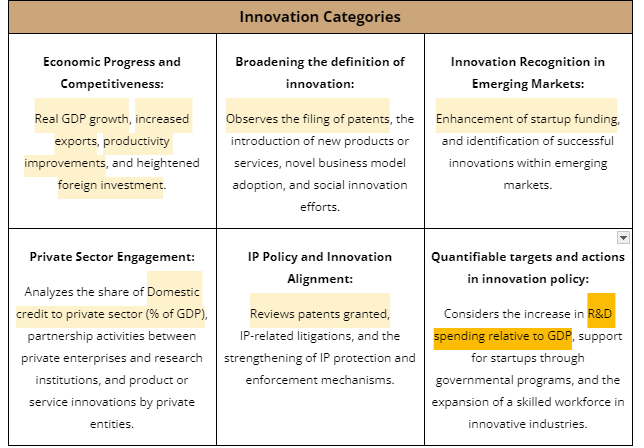

**1. Economic Progress and Competitiveness: 20%**
Justification: A strong economy provides the foundation for innovation activities. Economic progress and competitiveness are crucial for providing the necessary resources and environment. However, innovation also depends on specific strategies and policies beyond economic performance alone.

**2. Broadening the Definition of Innovation: 20%**
Justification: Expanding what is considered innovation (including social innovation, new business models, etc.) captures a wide range of activities that contribute to societal and economic development. This broad perspective is essential for fostering a comprehensive innovation ecosystem.

**3. Innovation Recognition in Emerging Markets: 15%**
Justification: Emerging markets often represent untapped potential for innovation due to their unique challenges and opportunities. Recognizing and supporting innovation in these markets is vital for global innovation dynamics but might not have the immediate impact of more established factors.

**4. Private Sector Engagement: 20%**
Justification: The private sector's involvement in R&D and collaboration with research institutions is a direct driver of innovation, translating ideas into marketable products and services. This category is crucial for the actual implementation of innovative ideas.

**5. IP Policy and Innovation Alignment: 10%**
Justification: While intellectual property protection is fundamental to encouraging innovation by ensuring inventors can benefit from their inventions, its weight is moderated because overly stringent IP policies can sometimes hinder the sharing of ideas necessary for collaborative innovation.

**6. Quantifiable Targets and Actions in Innovation Policy: 15%**
Justification: Setting clear, measurable goals for innovation policy is essential for tracking progress and making adjustments. This category ensures accountability and progress but is secondary to the direct activities driving innovation.

**Summary of Weights:**
Economic Progress and Competitiveness: 20%
Broadening the Definition of Innovation: 20%
Innovation Recognition in Emerging Markets: 15%
Private Sector Engagement: 20%
IP Policy and Innovation Alignment: 10%
Quantifiable Targets and Actions in Innovation Policy: 15%

first 4 features are coresponding to point 1 thus get 20%/4 = 0.05 as its weight

5th feature refers to point 2 0.2 weight

6th feature coresponds to point 5 thus 0.1 weight

7th feature corresponds to 4th point 0.2 weight

8 th feature to 6th point thus 0.15

9th feature for 3rd point 0.15

In [502]:
from sklearn.preprocessing import StandardScaler

In [503]:
weights = [0.05, 0.05, 0.05, 0.05, 0.2, 0.1, 0.2, 0.15, 0.15]

# Extract features from the DataFrame and standardize them
feature_columns = combined_df.columns[1:]  # Exclude 'Country' column
features = combined_df[feature_columns]
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Apply weights to the standardized features
# Ensure the weights array is correctly aligned with the features
weighted_features = features_standardized * weights

# Calculate the composite score as the sum of the weighted features for each row
combined_df['Composite Score'] = weighted_features.sum(axis=1)

# Optionally, rank the countries based on the composite score
combined_df['Rank'] = combined_df['Composite Score'].rank(ascending=False)

In [504]:
#getting positive scores
min_score = min(combined_df['Composite Score'])
combined_df['Composite Score'] = ((combined_df['Composite Score'] + abs(min_score) + 0.5) / (max(combined_df['Composite Score'])+ abs(min_score) + 0.5))*100

In [505]:
combined_df

,Country,% Real GDP Growth Average,Exports of goods and services (annual % growth) Average,Total factor productivity index Average,"Foreign direct investment, net inflows (BoP, current US$) Average",Total patent applications Average,Total Patent Grants Average,Domestic credit to private sector (% of GDP) Average,Research and development expenditure (% of GDP) Average,Startup Investment % GDP,Composite Score,Rank
0,Canada,1.942857,2.479582,0.988997,4.599610e+10,24938.666667,13231.076923,124.100000,1.749887,0.448598,22.253497,8.0
1,Japan,0.935714,4.180731,0.980737,2.422034e+10,451255.416667,294267.000000,170.413697,3.220568,0.155991,74.218455,2.0
2,Korea,2.921429,4.790139,0.985385,1.196662e+10,233389.583333,125328.000000,143.012865,4.159480,0.564565,72.690797,3.0
3,Singapore,4.242857,5.231873,1.023173,8.265107e+10,6770.000000,2959.692308,118.033363,1.993135,1.156317,54.925043,4.0
4,Switzerland,1.878571,4.096163,0.991001,-1.440898e+09,45277.250000,23238.538462,162.690878,3.117170,0.396040,49.566356,5.0
5,United Kingdom,1.528571,2.797035,0.992125,7.323908e+10,53211.083333,23649.769231,144.548896,2.238547,0.840391,43.603697,6.0
6,United States,2.121429,3.015769,0.990398,3.257491e+11,501963.666667,263321.384615,190.608821,2.932963,0.869497,100.000000,1.0
7,European Union,1.558333,4.623701,0.983199,4.943240e+11,54785.305556,30133.141025,92.005007,2.137544,0.335452,24.696996,7.0


# visulization

<ipython-input-508-db8a86fa6bac>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Composite Score', y='Country', data=df_sorted, palette='viridis')


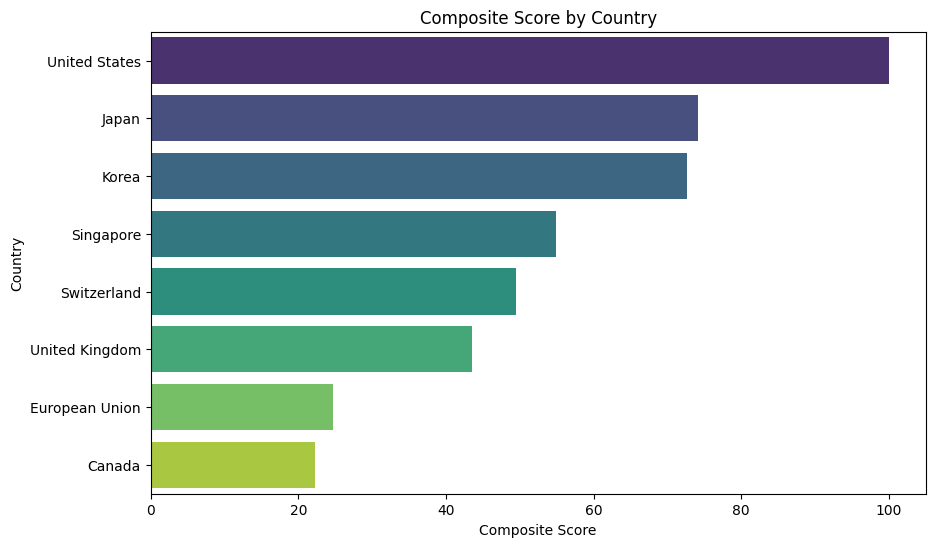

In [508]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# df = pd.read_csv('your_dataframe.csv')

# Sort the DataFrame based on Rank
df_sorted = combined_df.sort_values('Rank')

plt.figure(figsize=(10, 6))
sns.barplot(x='Composite Score', y='Country', data=df_sorted, palette='viridis')
plt.title('Composite Score by Country')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.show()


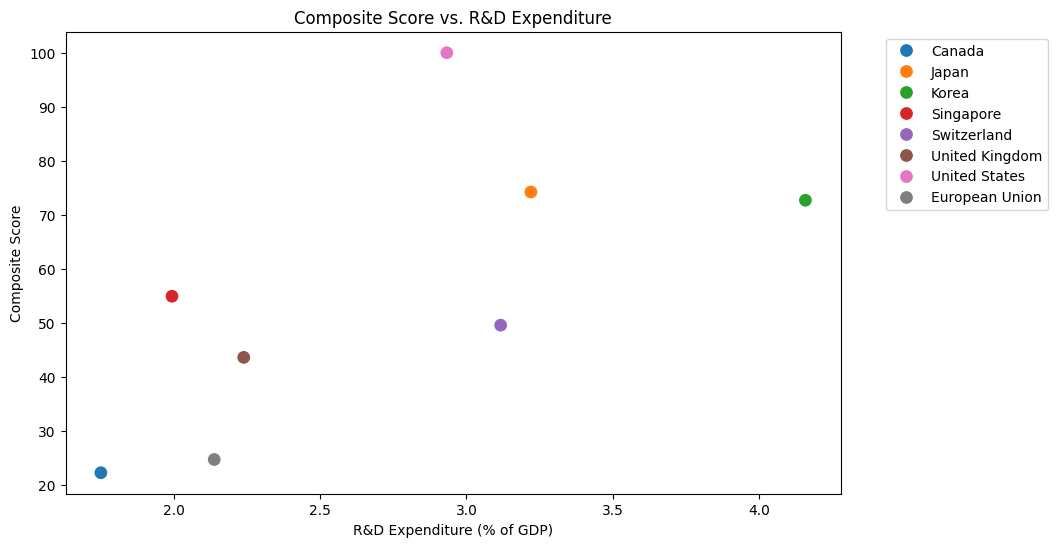

In [511]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_df, x='Research and development expenditure (% of GDP) Average', y='Composite Score', hue='Country', s=100)
plt.title('Composite Score vs. R&D Expenditure')
plt.xlabel('R&D Expenditure (% of GDP)')
plt.ylabel('Composite Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<ipython-input-512-c16372054067>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combined_df.corr(), annot=True, cmap='coolwarm')


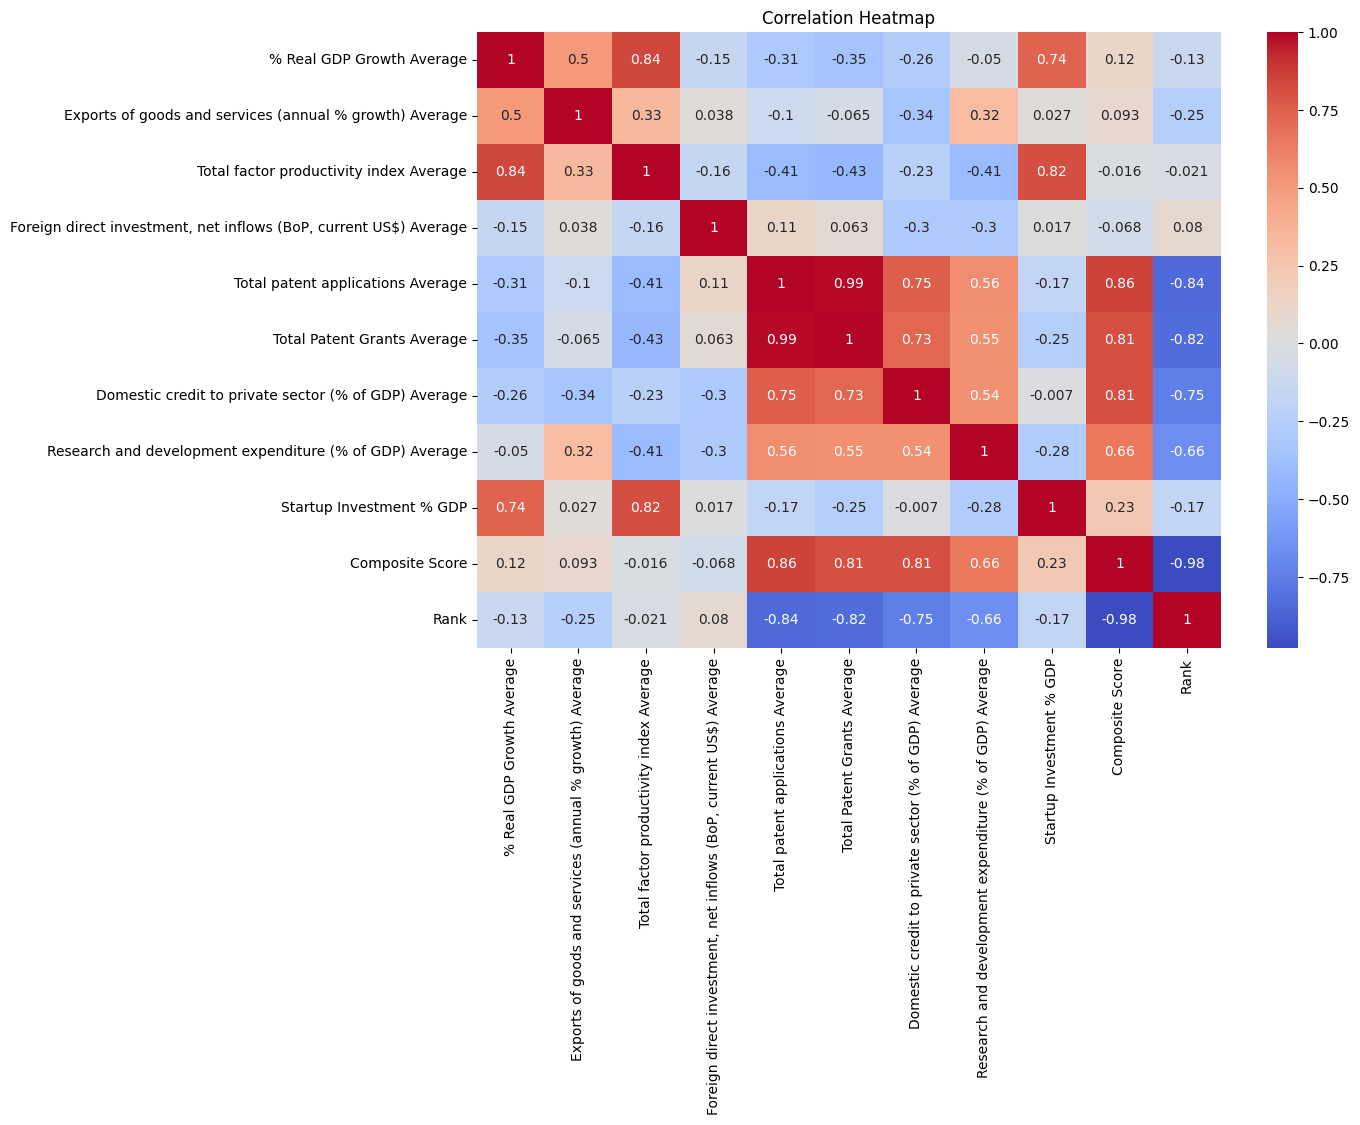

In [512]:
plt.figure(figsize=(12, 8))
sns.heatmap(combined_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


<ipython-input-513-321bc1425819>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rank', y='Country', data=df_sorted, palette='coolwarm')


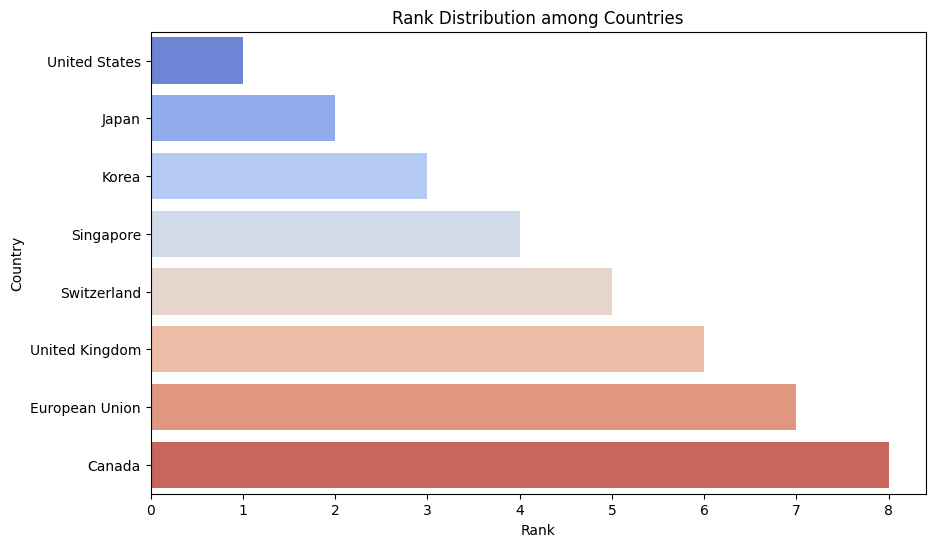

In [513]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Rank', y='Country', data=df_sorted, palette='coolwarm')
plt.title('Rank Distribution among Countries')
plt.xlabel('Rank')
plt.ylabel('Country')
plt.show()


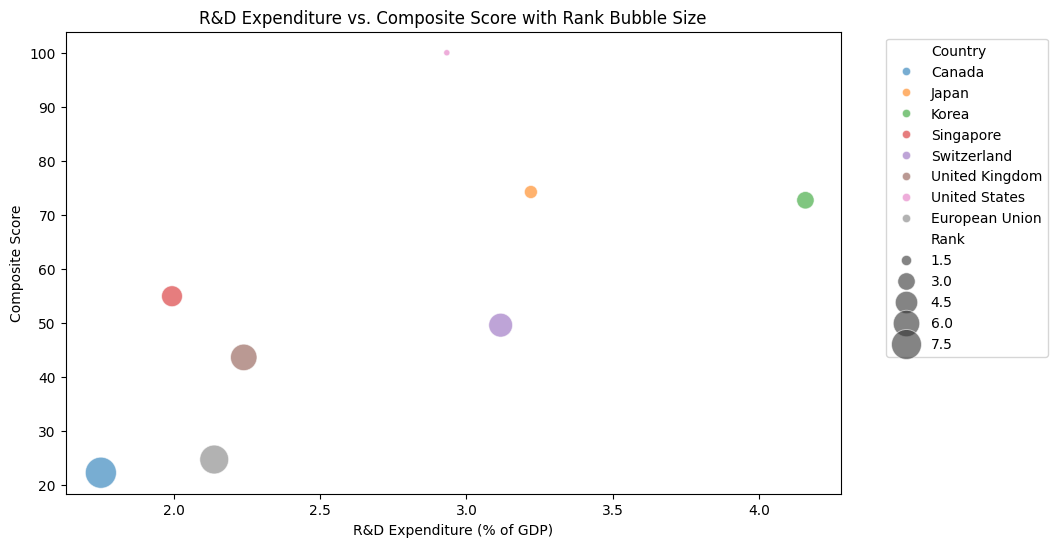

In [515]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_df, x='Research and development expenditure (% of GDP) Average', y='Composite Score', size='Rank', hue='Country', sizes=(20, 500), alpha=0.6)
plt.title('R&D Expenditure vs. Composite Score with Rank Bubble Size')
plt.xlabel('R&D Expenditure (% of GDP)')
plt.ylabel('Composite Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
